In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from io import BytesIO

from google.cloud import storage

storage_client = storage.Client()
bucket = storage_client.get_bucket('capstone_p')
blob = bucket.blob('yelp_business_merged_preprocessed.csv')
path = "gs://capstone_p/yelp_business_merged_preprocessed.csv"

In [2]:
import pandas as pd
import numpy as np
from sklearn.svm import LinearSVC
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix as cm,classification_report
import sklearn.metrics as metrics
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
data_com_buisness = pd.read_csv(path,encoding='utf-8')
data_com_buisness =data_com_buisness.head(200000)

In [5]:
np.random.seed(500)
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(data_com_buisness['text_1'],data_com_buisness['stars_y'],test_size=0.3)

In [6]:
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

In [6]:
Tfidf_vect = TfidfVectorizer(max_df=100.0,min_df=200)
Tfidf_vect.fit(data_com_buisness['text_1'].values.astype('U'))

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [8]:
Tfidf_vect.vocabulary_

{'emphas': 28781,
 'clasico': 18743,
 'larvae': 47805,
 'smoke': 75948,
 'kucinich': 47174,
 'comfiest': 19647,
 'caotic': 15590,
 'neuromancer': 56450,
 'clogger': 18997,
 'exect': 30451,
 'cotija': 21288,
 'obes': 57862,
 'comparatively': 19830,
 'efficiencies': 28124,
 'undriken': 86131,
 'itttttttttt': 44205,
 'suffocate': 79587,
 'vela': 87950,
 'shakes': 73712,
 'gilavalo': 36129,
 'boobies': 12653,
 'cudos': 22507,
 'baconsaf': 9276,
 'smore': 75999,
 '1000th': 162,
 'syrupi': 80597,
 'imposible': 42428,
 'hence': 39780,
 'moda': 54172,
 'gtr': 37965,
 'cream': 21820,
 'inplac': 43251,
 'dancing': 23154,
 '59th': 2562,
 'celebrti': 16524,
 'collecr': 19475,
 'seara': 72846,
 'looking': 49589,
 'tryst': 84778,
 'brauerei': 13276,
 'legassi': 48300,
 'indicates': 42801,
 'tankostu': 81111,
 'savories': 71993,
 'wanderings': 89470,
 'grenadin': 37540,
 'oringin': 59218,
 'seasonig': 72875,
 'mingle': 53607,
 'manapua': 51064,
 'feta': 31958,
 'selectively': 73118,
 'greulichs': 375

In [10]:
Train_X_Tfidf = Tfidf_vect.transform(Train_X.values.astype('U'))
Test_X_Tfidf = Tfidf_vect.transform(Test_X.values.astype('U'))

In [58]:
from sklearn.metrics import confusion_matrix as cm,classification_report
import sklearn.metrics as metrics
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=0.75, max_features=1900, max_depth=55, random_state=1)
gb_clf.fit(Train_X_Tfidf,Train_Y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.75, loss='deviance', max_depth=55,
                           max_features=1900, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=20,
                           n_iter_no_change=None, presort='auto',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [59]:

# Use accuracy_score function to get the accuracy
#print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)


In [60]:
predictions = gb_clf.predict(Test_X_Tfidf)
print(cm(Test_Y, predictions))
print('\n')
print("Classification Report ")
print(classification_report(Test_Y, predictions.astype(np.int)))
print("Random forest Accuracy Score ->",metrics.accuracy_score(Test_Y, predictions.astype(np.int)))

[[ 2663  1004  1016   926   953]
 [ 1014   915  1440  1542   851]
 [  575   863  1974  3320  1504]
 [  468   673  1750  6426  6448]
 [  468   543   929  4461 17274]]


Classification Report 
              precision    recall  f1-score   support

           0       0.51      0.41      0.45      6562
           1       0.23      0.16      0.19      5762
           2       0.28      0.24      0.26      8236
           3       0.39      0.41      0.40     15765
           4       0.64      0.73      0.68     23675

    accuracy                           0.49     60000
   macro avg       0.41      0.39      0.40     60000
weighted avg       0.47      0.49      0.48     60000

Random forest Accuracy Score -> 0.4875333333333333


In [57]:
import xgboost as xgb

ImportError: No module named 'xgboost'

In [ ]:
from sklearn.metrics import confusion_matrix as cm,classification_report
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(Train_X_Tfidf,Train_Y)
y_pred_random = regressor.predict(X_test)
# Use accuracy_score function to get the accuracy
#print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)
print(cm(Test_Y, y_pred_random))
print('\n')
print("Classification Report ")
print(classification_report(Test_Y, y_pred_random))
print("Random forest Accuracy Score ->",metrics.accuracy_score(Test_Y, y_pred_random))


In [10]:
# fit the training dataset on the NB classifier
from sklearn.metrics import confusion_matrix as cm,classification_report
import sklearn.metrics as metrics
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_NB = Naive.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
#print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)
print(cm(Test_Y, predictions_NB))
print('\n')
print("Classification Report ")
print(classification_report(Test_Y, predictions_NB))
print("Naive Bayes Accuracy Score ->",metrics.accuracy_score(Test_Y, predictions_NB))

[[ 2830     4    75  1269  2384]
 [  637     1   159  2483  2482]
 [  213     5    88  4178  3752]
 [   53     5    29  4392 11286]
 [   44     4    16  1457 22154]]


Classification Report 
              precision    recall  f1-score   support

           0       0.75      0.43      0.55      6562
           1       0.05      0.00      0.00      5762
           2       0.24      0.01      0.02      8236
           3       0.32      0.28      0.30     15765
           4       0.53      0.94      0.67     23675

    accuracy                           0.49     60000
   macro avg       0.38      0.33      0.31     60000
weighted avg       0.41      0.49      0.41     60000

Naive Bayes Accuracy Score -> 0.4910833333333333


In [10]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

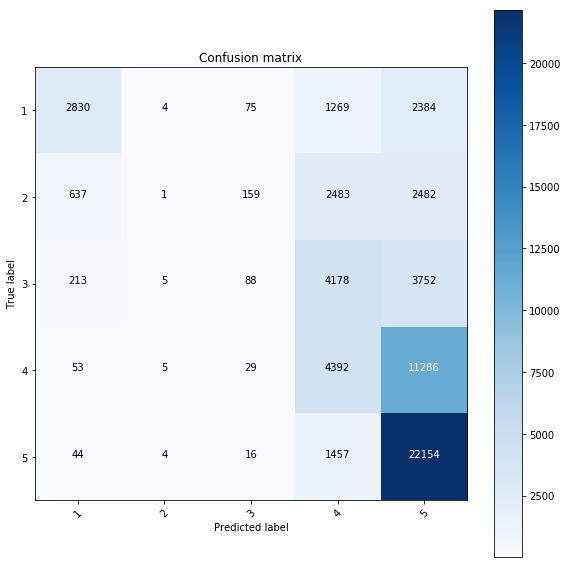

In [12]:
plot_confusion_matrix(cm(Test_Y, predictions_NB), classes=['1', '2','3','4','5'], title='Confusion matrix')

In [13]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg.fit(Train_X_Tfidf,Train_Y)
y_pred = logreg.predict(Test_X_Tfidf)
print(cm(Test_Y, y_pred))
print('\n')
print("Classification Report ")
print(classification_report(Test_Y, y_pred))
print("log reg  Accuracy Score ->",metrics.accuracy_score(Test_Y, y_pred))

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[[ 3700  1215   738   508   401]
 [ 1422  1517  1396   947   480]
 [  565  1270  2380  2727  1294]
 [  298   837  2301  6474  5855]
 [  285   525  1424  4962 16479]]


Classification Report 
              precision    recall  f1-score   support

           0       0.59      0.56      0.58      6562
           1       0.28      0.26      0.27      5762
           2       0.29      0.29      0.29      8236
           3       0.41      0.41      0.41     15765
           4       0.67      0.70      0.68     23675

    accuracy                           0.51     60000
   macro avg       0.45      0.44      0.45     60000
weighted avg       0.51      0.51      0.51     60000

log reg  Accuracy Score -> 0.5091666666666667


/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


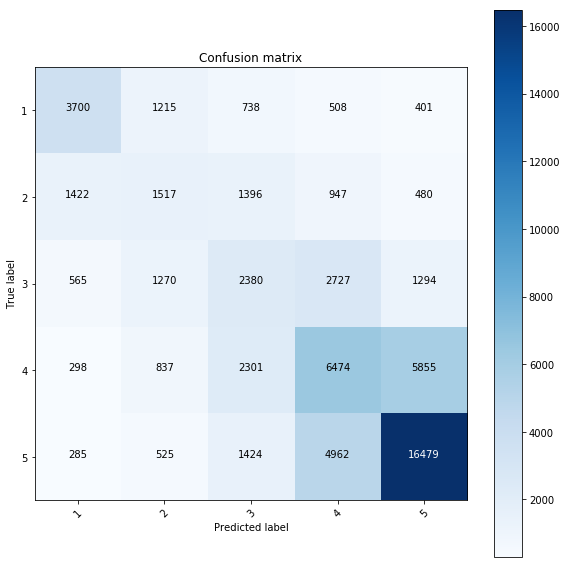

In [14]:
plot_confusion_matrix(cm(Test_Y, y_pred), classes=['1', '2','3','4','5'], title='Confusion matrix')

In [31]:
from sklearn.svm import LinearSVC
model = LinearSVC()
model.fit(Train_X_Tfidf,Train_Y)
print('----')
y_pred_svc = model.predict(Test_X_Tfidf)
print(cm(Test_Y, y_pred_svc))
print('\n')
print("Classification Report ")
print(classification_report(Test_Y, y_pred_svc))
print("linear SVC Accuracy Score  Count vect->",metrics.accuracy_score(Test_Y, y_pred_svc))

----
[[ 4805   849   388   205   315]
 [ 1719  1521  1396   713   413]
 [  544   920  2782  2941  1049]
 [  209   279  1383  7437  6457]
 [  148    89   336  3734 19368]]


Classification Report 
              precision    recall  f1-score   support

           0       0.65      0.73      0.69      6562
           1       0.42      0.26      0.32      5762
           2       0.44      0.34      0.38      8236
           3       0.49      0.47      0.48     15765
           4       0.70      0.82      0.76     23675

    accuracy                           0.60     60000
   macro avg       0.54      0.52      0.53     60000
weighted avg       0.58      0.60      0.58     60000

linear SVC Accuracy Score  Count vect-> 0.59855


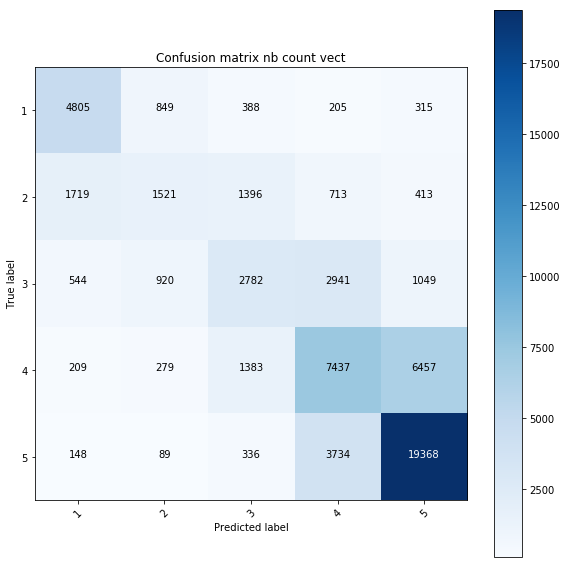

In [32]:
plot_confusion_matrix(cm(Test_Y, y_pred_svc), classes=['1', '2','3','4','5'], title='Confusion matrix nb count vect')

In [61]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
data = vec.fit_transform(data_com_buisness['text_1'])

In [62]:
vector = vec.transform(data_com_buisness['text_1'])
# summarize encoded vector
print(vector.shape)
print(type(vector))

(200000, 94322)
<class 'scipy.sparse.csr.csr_matrix'>


In [63]:
Train_X_count_vec = vec.transform(Train_X.values.astype('U'))
Test_X_count_vec = vec.transform(Test_X.values.astype('U'))

In [ ]:
from sklearn.metrics import confusion_matrix as cm,classification_report
import sklearn.metrics as metrics
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=1900, max_depth=55, random_state=0)
gb_clf.fit(Train_X_count_vec,Train_Y)

In [ ]:
predictions = gb_clf.predict(Test_X_count_vec)
print(cm(Test_Y, predictions))
print('\n')
print("Classification Report ")
print(classification_report(Test_Y, predictions))
print("gradiant  forest Accuracy Score ->",metrics.accuracy_score(Test_Y, predictions))

In [20]:
from sklearn.metrics import confusion_matrix as cm,classification_report
import sklearn.metrics as metrics
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_count_vec,Train_Y)
# predict the labels on validation dataset
predictions_NB = Naive.predict(Test_X_count_vec)
# Use accuracy_score function to get the accuracy
#print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)
print(cm(Test_Y, predictions_NB))
print('\n')
print("Classification Report ")
print(classification_report(Test_Y, predictions_NB))
print("Naive Bayes Accuracy Score using count vect ->",metrics.accuracy_score(Test_Y, predictions_NB))

[[ 4474  1190   460   224   214]
 [ 1584  1432  1680   732   334]
 [  789   737  2843  2933   934]
 [  512   273  1875  7092  6013]
 [  701    81   526  3745 18622]]


Classification Report 
              precision    recall  f1-score   support

           0       0.56      0.68      0.61      6562
           1       0.39      0.25      0.30      5762
           2       0.39      0.35      0.36      8236
           3       0.48      0.45      0.47     15765
           4       0.71      0.79      0.75     23675

    accuracy                           0.57     60000
   macro avg       0.50      0.50      0.50     60000
weighted avg       0.56      0.57      0.56     60000

Naive Bayes Accuracy Score using count vect -> 0.5743833333333334


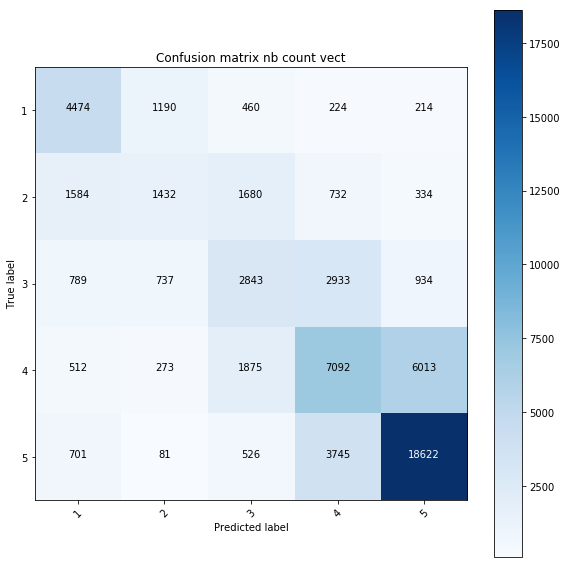

In [21]:
plot_confusion_matrix(cm(Test_Y, predictions_NB), classes=['1', '2','3','4','5'], title='Confusion matrix nb count vect')

In [22]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg.fit(Train_X_count_vec, Train_Y)
y_pred = logreg.predict(Test_X_count_vec)
print(cm(Test_Y, y_pred))
print('\n')
print("Classification Report ")
print(classification_report(Test_Y, y_pred))
print("log reg  Accuracy Score ->",metrics.accuracy_score(Test_Y, y_pred))

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[[ 4279  1134   475   295   379]
 [ 1472  1668  1384   767   471]
 [  497  1148  2729  2742  1120]
 [  223   489  1634  6983  6436]
 [  178   210   468  3957 18862]]


Classification Report 
              precision    recall  f1-score   support

           0       0.64      0.65      0.65      6562
           1       0.36      0.29      0.32      5762
           2       0.41      0.33      0.37      8236
           3       0.47      0.44      0.46     15765
           4       0.69      0.80      0.74     23675

    accuracy                           0.58     60000
   macro avg       0.52      0.50      0.51     60000
weighted avg       0.56      0.58      0.56     60000

log reg  Accuracy Score -> 0.57535


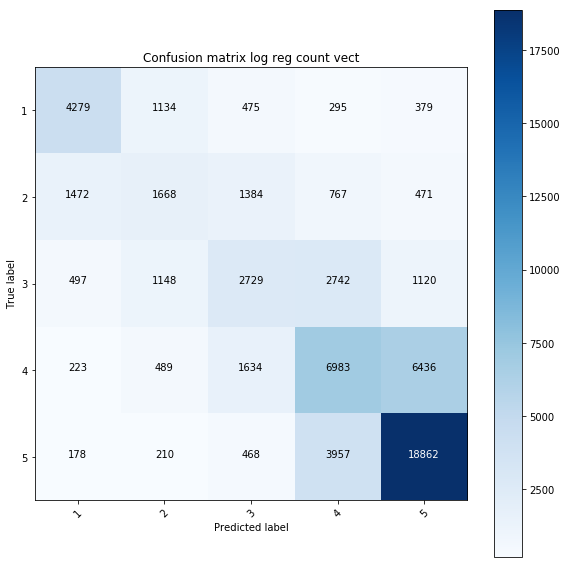

In [23]:
plot_confusion_matrix(cm(Test_Y, y_pred), classes=['1', '2','3','4','5'], title='Confusion matrix log reg count vect')

In [24]:
from sklearn.svm import LinearSVC
model = LinearSVC()
model.fit(Train_X_count_vec, Train_Y)
print('----')
y_pred_svc = model.predict(Test_X_count_vec)
print(cm(Test_Y, y_pred_svc))
print('\n')
print("Classification Report ")
print(classification_report(Test_Y, y_pred_svc))
print("linear SVC Accuracy Score  Count vect->",metrics.accuracy_score(Test_Y, y_pred_svc))

----
[[ 4268  1061   500   318   415]
 [ 1542  1621  1379   741   479]
 [  560  1141  2682  2673  1180]
 [  254   501  1832  6628  6550]
 [  190   222   636  3923 18704]]


Classification Report 
              precision    recall  f1-score   support

           0       0.63      0.65      0.64      6562
           1       0.36      0.28      0.31      5762
           2       0.38      0.33      0.35      8236
           3       0.46      0.42      0.44     15765
           4       0.68      0.79      0.73     23675

    accuracy                           0.57     60000
   macro avg       0.50      0.49      0.50     60000
weighted avg       0.55      0.57      0.55     60000

linear SVC Accuracy Score  Count vect-> 0.56505


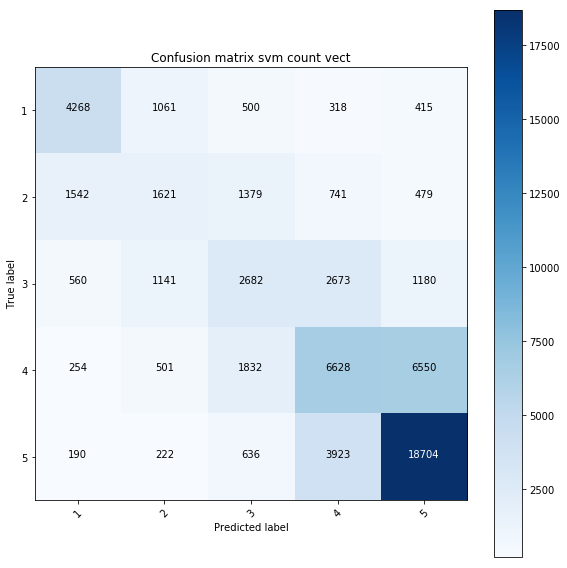

In [26]:
plot_confusion_matrix(cm(Test_Y, y_pred_svc), classes=['1', '2','3','4','5'], title='Confusion matrix svm count vect')

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
vec_transformed = CountVectorizer(min_df=200, max_df=150.0, lowercase=True)
data = vec_transformed.fit_transform(data_com_buisness['text_1'])

In [34]:
Train_X_count_vec_tran = vec_transformed.transform(Train_X.values.astype('U'))
Test_X_count_vec_tran = vec_transformed.transform(Test_X.values.astype('U'))

In [35]:
Naive_count = naive_bayes.MultinomialNB()
Naive_count.fit(Train_X_count_vec_tran,Train_Y)
# predict the labels on validation dataset
predictions_NB_vec = Naive_count.predict(Test_X_count_vec_tran)
# Use accuracy_score function to get the accuracy
#print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)
print(cm(Test_Y, predictions_NB_vec))
print('\n')
print("Classification Report ")
print(classification_report(Test_Y, predictions_NB_vec))
print("Naive Bayes Accuracy Score using count vect min df ->",metrics.accuracy_score(Test_Y, predictions_NB_vec))

[[ 4394  1408   379   159   222]
 [ 1556  1842  1488   545   331]
 [  791  1057  2992  2483   913]
 [  574   447  2101  6600  6043]
 [  870   170   657  3459 18519]]


Classification Report 
              precision    recall  f1-score   support

           0       0.54      0.67      0.60      6562
           1       0.37      0.32      0.34      5762
           2       0.39      0.36      0.38      8236
           3       0.50      0.42      0.45     15765
           4       0.71      0.78      0.75     23675

    accuracy                           0.57     60000
   macro avg       0.50      0.51      0.50     60000
weighted avg       0.56      0.57      0.56     60000

Naive Bayes Accuracy Score using count vect min df -> 0.57245


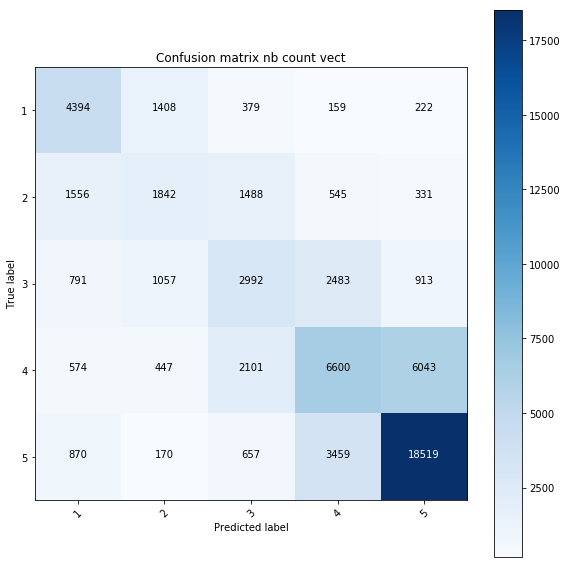

In [36]:
plot_confusion_matrix(cm(Test_Y, predictions_NB_vec), classes=['1', '2','3','4','5'], title='Confusion matrix nb count vect')

In [37]:
from sklearn.svm import LinearSVC
model = LinearSVC()
model.fit(Train_X_count_vec_tran, Train_Y)
y_pred_svc1 = model.predict(Test_X_count_vec_tran)
print(cm(Test_Y, y_pred_svc1))
print('\n')
print("Classification Report ")
print(classification_report(Test_Y, y_pred_svc1))
print("linear SVC Accuracy Score  Count vect->",metrics.accuracy_score(Test_Y, y_pred_svc1))

[[ 4822   670   314   251   505]
 [ 1789  1347  1277   727   622]
 [  582   784  2591  2812  1467]
 [  203   215  1069  6583  7695]
 [  126    56   219  2698 20576]]


Classification Report 
              precision    recall  f1-score   support

           0       0.64      0.73      0.68      6562
           1       0.44      0.23      0.30      5762
           2       0.47      0.31      0.38      8236
           3       0.50      0.42      0.46     15765
           4       0.67      0.87      0.75     23675

    accuracy                           0.60     60000
   macro avg       0.54      0.51      0.52     60000
weighted avg       0.57      0.60      0.57     60000

linear SVC Accuracy Score  Count vect-> 0.59865


/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


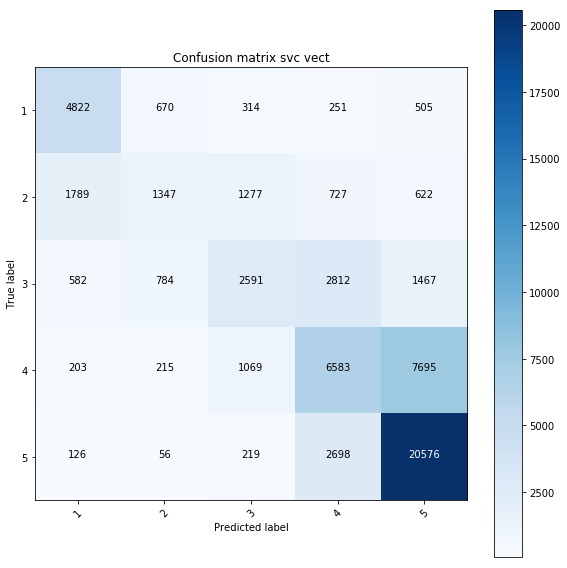

In [38]:
plot_confusion_matrix(cm(Test_Y, y_pred_svc1), classes=['1', '2','3','4','5'], title='Confusion matrix svc vect')

In [39]:
from sklearn.linear_model import LogisticRegression
logreg1 = LogisticRegression(n_jobs=1, C=1e5)
logreg1.fit(Train_X_count_vec_tran, Train_Y)
y_pred_vect_1 = logreg1.predict(Test_X_count_vec_tran)
print(cm(Test_Y, y_pred_vect_1))
print('\n')
print("Classification Report ")
print(classification_report(Test_Y, y_pred_vect_1))
print("log reg  Accuracy Score ->",metrics.accuracy_score(Test_Y, y_pred_vect_1))

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[[ 4681   784   360   279   458]
 [ 1645  1418  1375   759   565]
 [  518   820  2749  2858  1291]
 [  160   217  1223  6966  7199]
 [  127    57   241  3007 20243]]


Classification Report 
              precision    recall  f1-score   support

           0       0.66      0.71      0.68      6562
           1       0.43      0.25      0.31      5762
           2       0.46      0.33      0.39      8236
           3       0.50      0.44      0.47     15765
           4       0.68      0.86      0.76     23675

    accuracy                           0.60     60000
   macro avg       0.55      0.52      0.52     60000
weighted avg       0.58      0.60      0.58     60000

log reg  Accuracy Score -> 0.60095


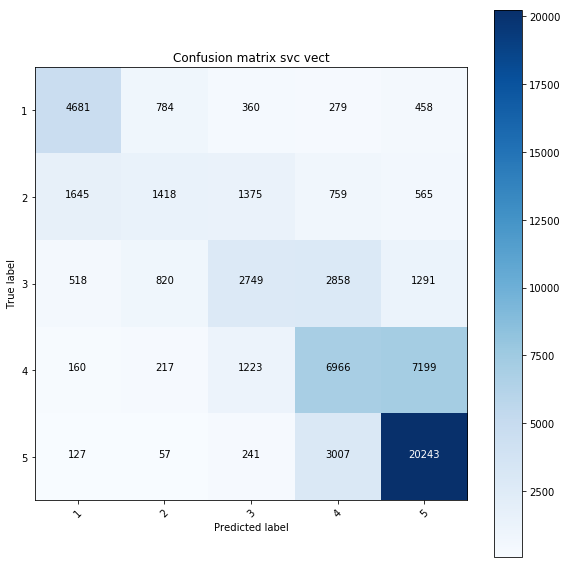

In [40]:
plot_confusion_matrix(cm(Test_Y, y_pred_vect_1), classes=['1', '2','3','4','5'], title='Confusion matrix svc vect')

In [42]:
from sklearn.neighbors import KNeighborsClassifier

kmodel = KNeighborsClassifier(n_neighbors=3)
kmodel.fit(Train_X_count_vec_tran, Train_Y)
y_pred_vect_1 = kmodel.predict(Test_X_count_vec_tran)
print(cm(Test_Y, y_pred_vect_1))
print('\n')
print("Classification Report ")
print(classification_report(Test_Y, y_pred_vect_1))
print("knn  Accuracy Score ->",metrics.accuracy_score(Test_Y, y_pred_vect_1))

[[ 2641   647  1334   551  1389]
 [ 1439   748  1273   832  1470]
 [ 1252   811  2037  1765  2371]
 [ 1277   868  3058  3755  6807]
 [ 1295   622  4228  3728 13802]]


Classification Report 
              precision    recall  f1-score   support

           0       0.33      0.40      0.37      6562
           1       0.20      0.13      0.16      5762
           2       0.17      0.25      0.20      8236
           3       0.35      0.24      0.28     15765
           4       0.53      0.58      0.56     23675

    accuracy                           0.38     60000
   macro avg       0.32      0.32      0.31     60000
weighted avg       0.38      0.38      0.38     60000

log reg  Accuracy Score -> 0.38305


In [4]:
from collections import Counter
 
def balance_classes(xs, ys):
##"""Undersample xs, ys to balance classes."""
  freqs = Counter(ys)
  max_allowable = freqs.most_common()[-1][1]
  num_added = {clss: 0 for clss in freqs.keys()}  
  new_ys = []
  new_xs = []
  for i, y in enumerate(ys):
    if num_added[y] < max_allowable:
       new_ys.append(y)
       new_xs.append(xs[i])
       num_added[y] += 1
  return new_xs, new_ys

In [5]:
print(Counter(data_com_buisness['stars_y']))
balanced_x, balanced_y = balance_classes(data_com_buisness['text_1'], data_com_buisness['stars_y'])
print(Counter(balanced_y))

Counter({5: 78617, 4: 52579, 3: 27848, 1: 22068, 2: 18888})
Counter({1: 18888, 2: 18888, 3: 18888, 4: 18888, 5: 18888})


In [6]:
Train_X_balanced, Test_X_balanced, Train_Y_balanced, Test_Y_balanced = model_selection.train_test_split(balanced_x,balanced_y,test_size=0.3)

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
vec_transformed = CountVectorizer(min_df=200, max_df=150.0, lowercase=True)
data = vec_transformed.fit_transform(balanced_x)

In [8]:
Train_X_count_vec_bal = vec_transformed.transform(Train_X_balanced)
Test_X_count_vec_bal = vec_transformed.transform(Test_X_balanced)

In [50]:
Naive_count = naive_bayes.MultinomialNB()
Naive_count.fit(Train_X_count_vec_bal,Train_Y_balanced)
# predict the labels on validation dataset
predictions_NB_vec = Naive_count.predict(Test_X_count_vec_bal)
# Use accuracy_score function to get the accuracy
#print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)
print(cm(Test_Y_balanced, predictions_NB_vec))
print('\n')
print("Classification Report ")
print(classification_report(Test_Y_balanced, predictions_NB_vec))
print("Naive Bayes Accuracy Score using count vect min df ->",metrics.accuracy_score(Test_Y_balanced, predictions_NB_vec))

[[3808 1450  239  120  124]
 [1486 2079 1329  479  259]
 [ 599  879 2191 1479  447]
 [ 212  181  755 2525 2007]
 [ 251   78  176  781 4398]]


Classification Report 
              precision    recall  f1-score   support

         1.0       0.60      0.66      0.63      5741
         2.0       0.45      0.37      0.40      5632
         3.0       0.47      0.39      0.43      5595
         4.0       0.47      0.44      0.46      5680
         5.0       0.61      0.77      0.68      5684

    accuracy                           0.53     28332
   macro avg       0.52      0.53      0.52     28332
weighted avg       0.52      0.53      0.52     28332

Naive Bayes Accuracy Score using count vect min df -> 0.5294719751517718


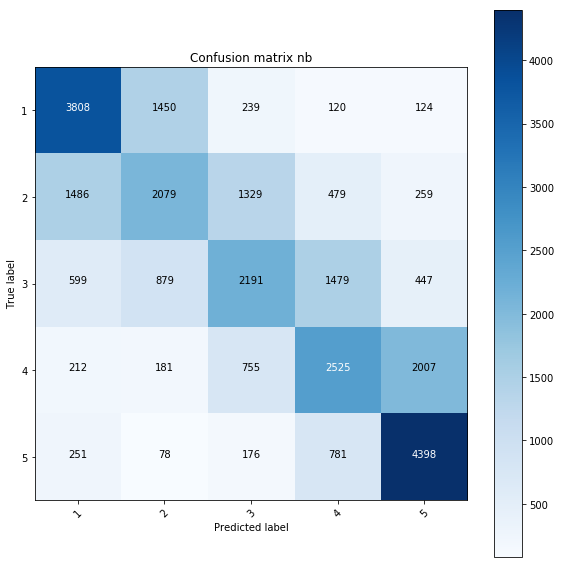

In [51]:
plot_confusion_matrix(cm(Test_Y_balanced, predictions_NB_vec), classes=['1', '2','3','4','5'], title='Confusion matrix nb')

In [52]:
from sklearn.svm import LinearSVC
model = LinearSVC()
model.fit(Train_X_count_vec_bal,Train_Y_balanced)
y_pred_svc1 = model.predict(Test_X_count_vec_bal)
print(cm(Test_Y_balanced, y_pred_svc1))
print('\n')
print("Classification Report ")
print(classification_report(Test_Y_balanced, y_pred_svc1))
print("linear SVC Accuracy Score  Count vect->",metrics.accuracy_score(Test_Y_balanced, y_pred_svc1))

[[4309  963  226   97  146]
 [1785 2166 1129  315  237]
 [ 562 1075 2373 1155  430]
 [ 132  212  860 2572 1904]
 [  87   57  154  923 4463]]


Classification Report 
              precision    recall  f1-score   support

         1.0       0.63      0.75      0.68      5741
         2.0       0.48      0.38      0.43      5632
         3.0       0.50      0.42      0.46      5595
         4.0       0.51      0.45      0.48      5680
         5.0       0.62      0.79      0.69      5684

    accuracy                           0.56     28332
   macro avg       0.55      0.56      0.55     28332
weighted avg       0.55      0.56      0.55     28332

linear SVC Accuracy Score  Count vect-> 0.5606028518989129


/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


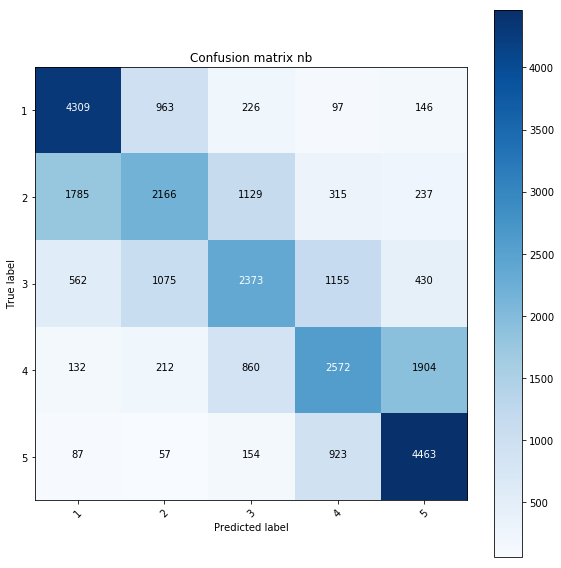

In [53]:
plot_confusion_matrix(cm(Test_Y_balanced, y_pred_svc1), classes=['1', '2','3','4','5'], title='Confusion matrix nb')

In [54]:
from sklearn.linear_model import LogisticRegression
logreg1 = LogisticRegression(n_jobs=1, C=1e5)
logreg1.fit(Train_X_count_vec_bal,Train_Y_balanced)
y_pred_vect_1 = logreg1.predict(Test_X_count_vec_bal)
print(cm(Test_Y_balanced, y_pred_vect_1))
print('\n')
print("Classification Report ")
print(classification_report(Test_Y_balanced, y_pred_vect_1))
print("log reg  Accuracy Score ->",metrics.accuracy_score(Test_Y_balanced, y_pred_vect_1))

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[[4169 1081  256  102  133]
 [1604 2310 1191  322  205]
 [ 481 1132 2488 1121  373]
 [ 114  226  950 2624 1766]
 [  85   68  186 1000 4345]]


Classification Report 
              precision    recall  f1-score   support

         1.0       0.65      0.73      0.68      5741
         2.0       0.48      0.41      0.44      5632
         3.0       0.49      0.44      0.47      5595
         4.0       0.51      0.46      0.48      5680
         5.0       0.64      0.76      0.69      5684

    accuracy                           0.56     28332
   macro avg       0.55      0.56      0.55     28332
weighted avg       0.55      0.56      0.55     28332

log reg  Accuracy Score -> 0.5624735281660314


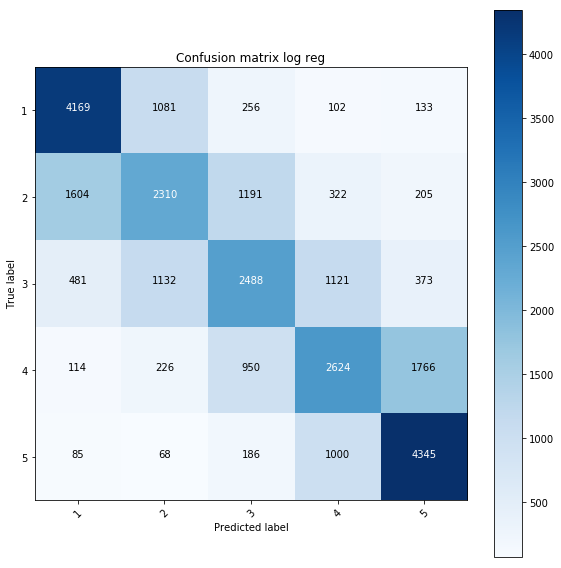

In [55]:
plot_confusion_matrix(cm(Test_Y_balanced, y_pred_vect_1), classes=['1', '2','3','4','5'], title='Confusion matrix log reg')

In [9]:
from sklearn import  svm

SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_count_vec_bal,Train_Y_balanced)
print('---')
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_count_vec_bal)

print(cm(Test_Y_balanced, predictions_SVM))
print('\n')
print("Classification Report ")
print(classification_report(Test_Y_balanced, predictions_SVM))
print("log reg  Accuracy Score ->",metrics.accuracy_score(Test_Y_balanced, predictions_SVM))

---
[[3899 1223  285   89   65]
 [1505 2554 1197  244  101]
 [ 381 1358 2596 1091  248]
 [ 108  345 1086 2646 1498]
 [ 106  116  277 1241 4073]]


Classification Report 
              precision    recall  f1-score   support

           1       0.65      0.70      0.67      5561
           2       0.46      0.46      0.46      5601
           3       0.48      0.46      0.47      5674
           4       0.50      0.47      0.48      5683
           5       0.68      0.70      0.69      5813

    accuracy                           0.56     28332
   macro avg       0.55      0.56      0.55     28332
weighted avg       0.55      0.56      0.55     28332

log reg  Accuracy Score -> 0.5565438373570522
